In [57]:
# install the required packages

%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [58]:
# import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler

In [59]:
# Load dataset

file_path = "dataset.csv"
df = pd.read_csv(file_path)

In [60]:
# Convert specified columns to numeric, setting invalid parsing to NaN

numeric_columns = ["Tenure", "WarehouseToHome", "HourSpendOnApp", 
                "OrderAmountHikeFromlastYear", "OrderCount", "DaySinceLastOrder"]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [61]:
# Replace zeros with NaN in specified columns

cols_to_replace_zeros = ["CashbackAmount", "CouponUsed"]
df[cols_to_replace_zeros] = df[cols_to_replace_zeros].replace(0, np.nan)

In [62]:
# Identify numeric and categorical columns in the DataFrame

numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(exclude=['number']).columns.tolist()

In [63]:
# Fill missing values in numeric columns with the median value

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing values in categorical columns with the mode (most frequent value)

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0])
    

In [64]:
# Identify and drop columns with zero variance (i.e., columns where all values are the same)

zero_variance_cols = [col for col in numeric_cols if df[col].nunique() == 1]
df = df.drop(columns=zero_variance_cols)
print("Dropped zero-variance columns:", zero_variance_cols)

Dropped zero-variance columns: []


In [65]:
# (a) Calculate mean, median, and standard deviation

numeric_cols = df.select_dtypes(include=['number'])
stats = numeric_cols.describe().T
stats["median"] = numeric_cols.median()
print("\nSummary Statistics:")
print(stats)


Summary Statistics:
                              count          mean          std      min  \
CustomerID                   5630.0  52815.500000  1625.385339  50001.0   
Churn                        5630.0      0.168384     0.374240      0.0   
Tenure                       5630.0     10.134103     8.357951      0.0   
CityTier                     5630.0      1.654707     0.915389      1.0   
WarehouseToHome              5630.0     15.566785     8.345961      5.0   
HourSpendOnApp               5630.0      2.934636     0.705528      0.0   
NumberOfDeviceRegistered     5630.0      3.688988     1.023999      1.0   
SatisfactionScore            5630.0      3.066785     1.380194      1.0   
NumberOfAddress              5630.0      4.214032     2.583586      1.0   
Complain                     5630.0      0.284902     0.451408      0.0   
OrderAmountHikeFromlastYear  5630.0     15.674600     3.591058     11.0   
CouponUsed                   5630.0      2.128242     1.654433      1.0   
Orde

In [66]:
# Select specific features from the DataFrame for further analysis

selected_features = ["Churn", "Tenure", "CityTier", "HourSpendOnApp", 
                    "SatisfactionScore", "OrderCount", "DaySinceLastOrder", "CashbackAmount"]
df_filtered = df[selected_features]

In [67]:
# Standardize the selected features

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_filtered), columns=selected_features)

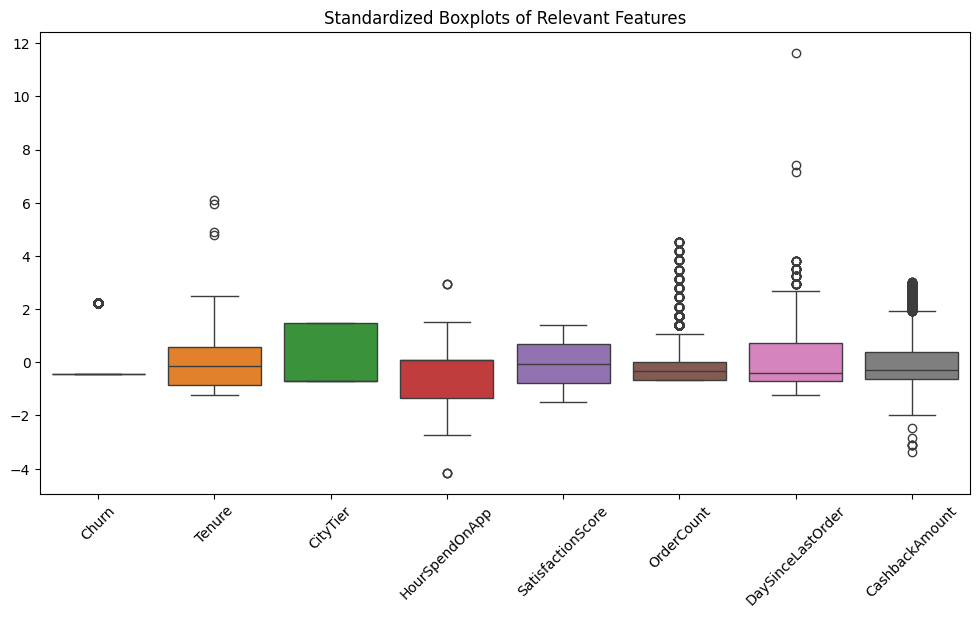

In [68]:
# (b) Plot the boxplots

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_scaled)
plt.xticks(rotation=45)
plt.title("Standardized Boxplots of Relevant Features")
plt.show()

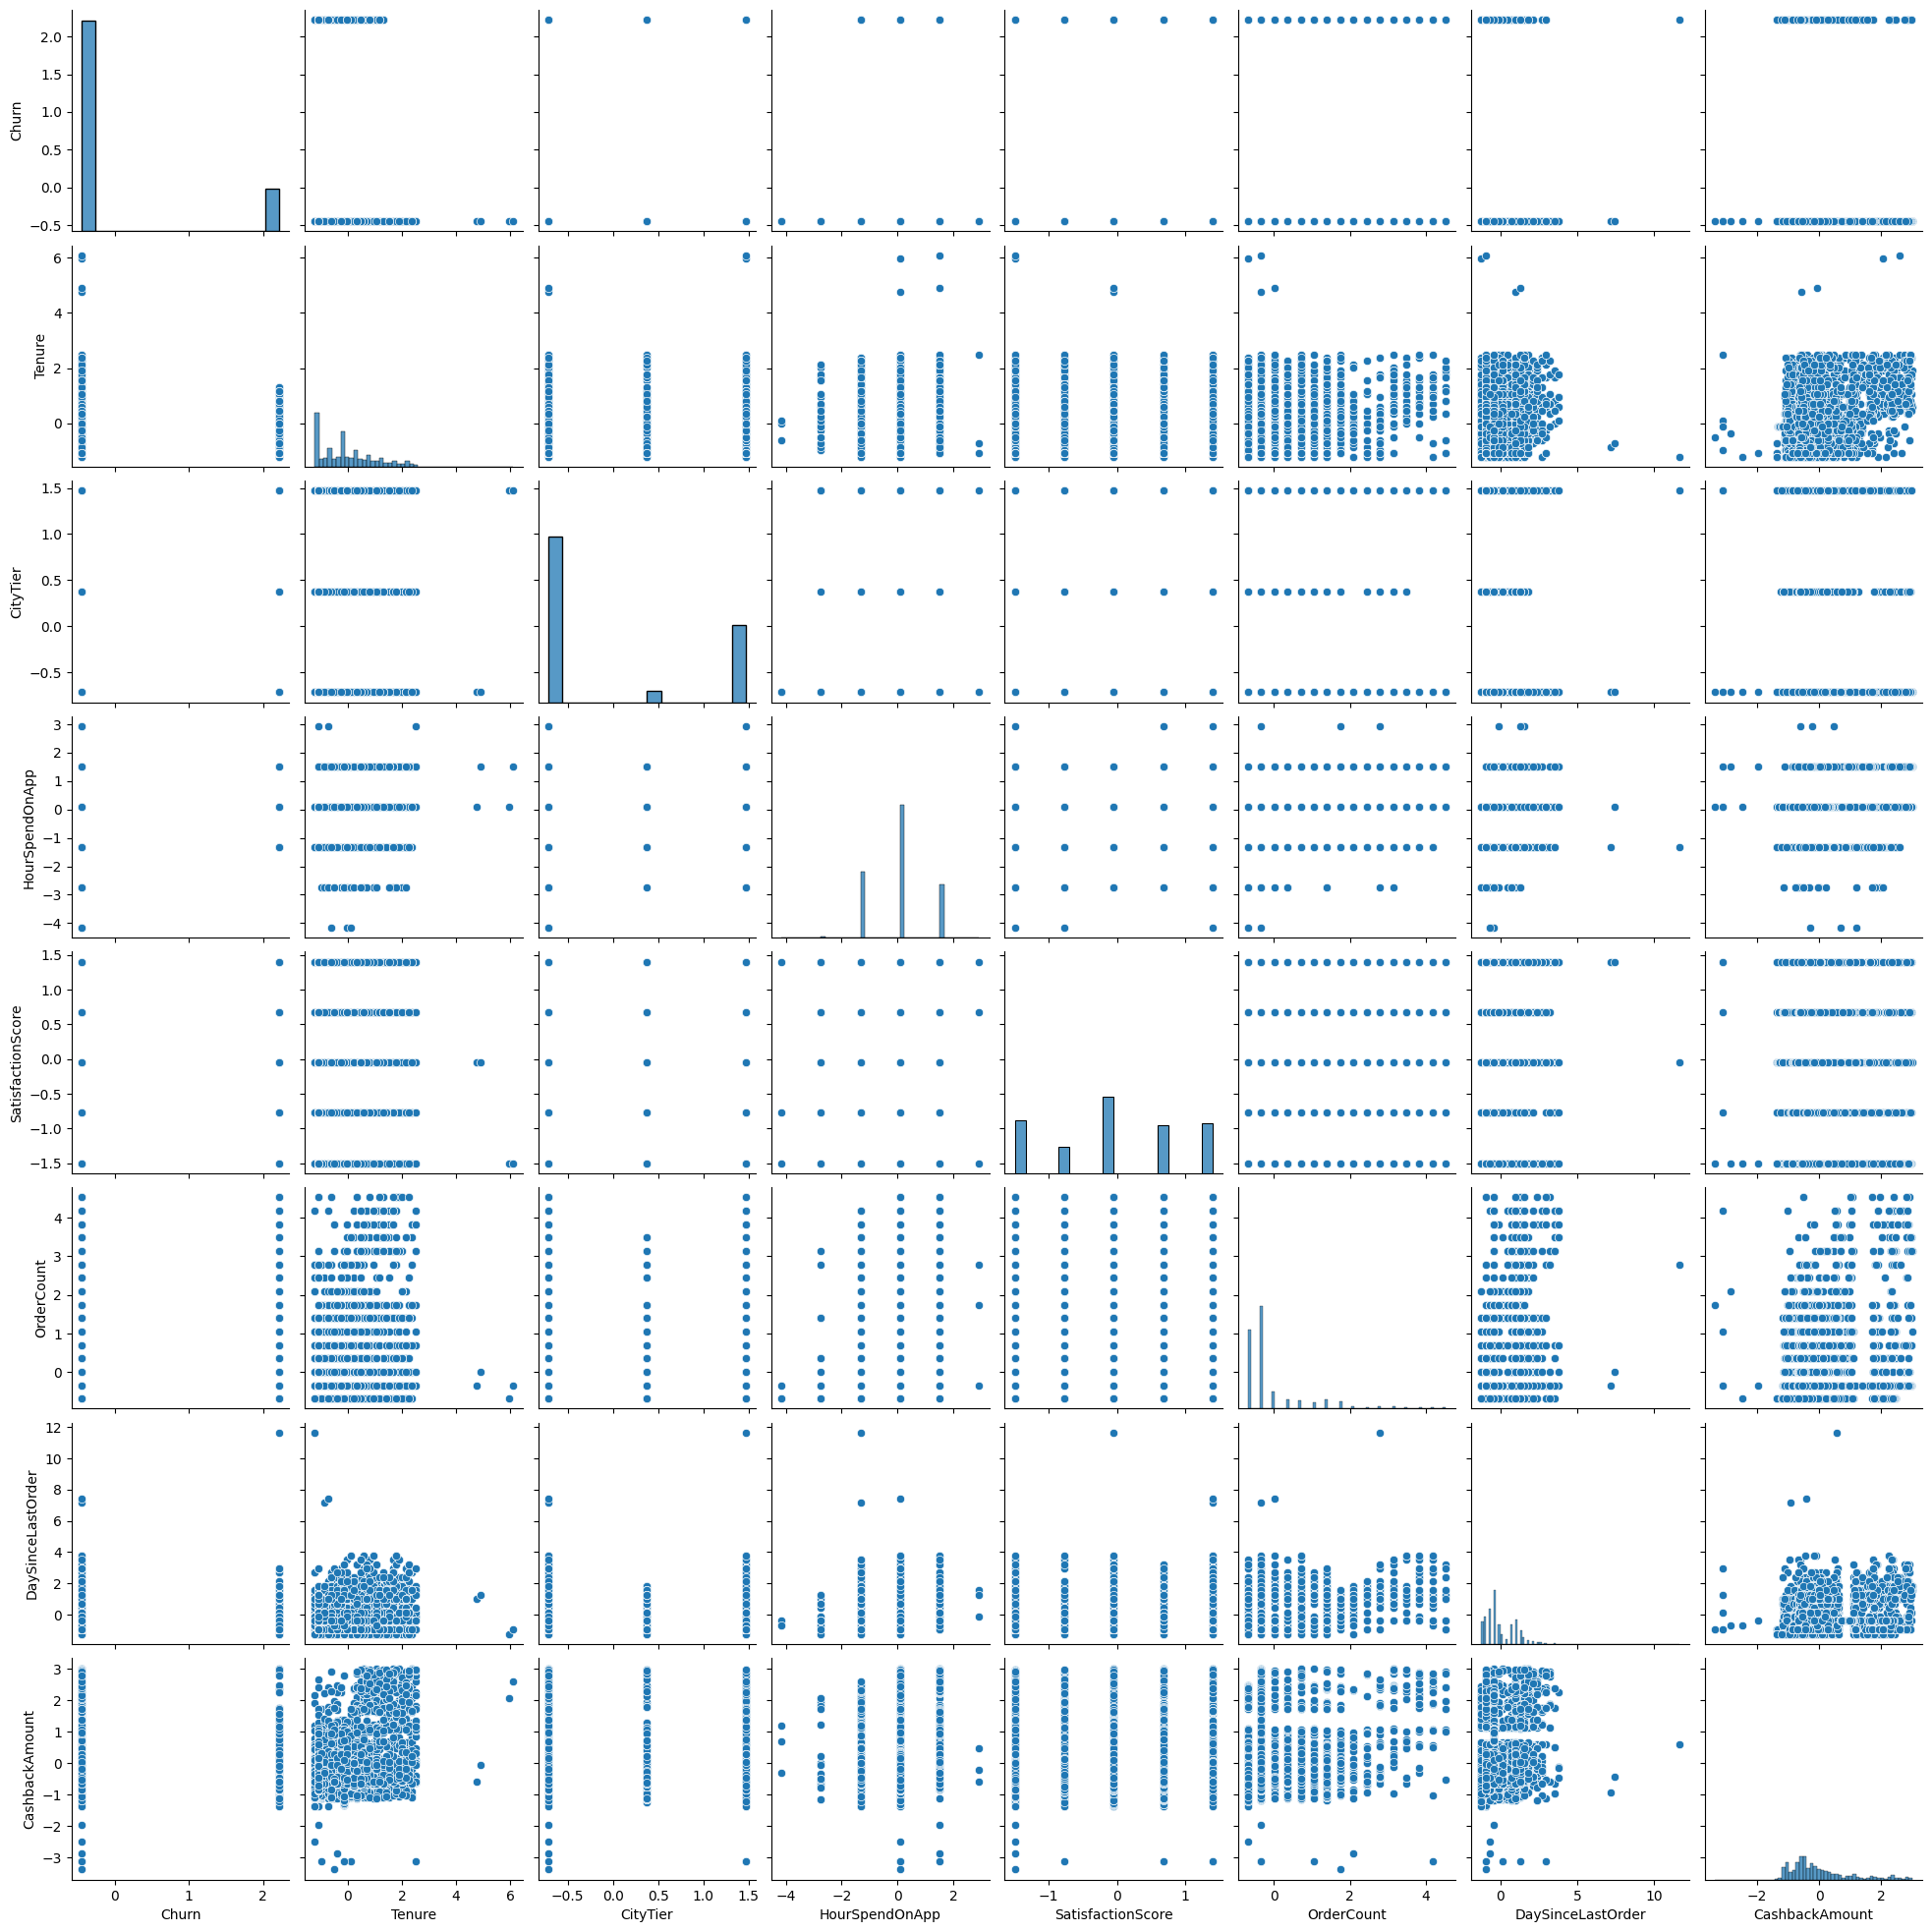

In [69]:
#(c) Draw pairplots

sns.pairplot(df_scaled)
plt.show()

In [70]:
#(d) Calculate Pearson's correlation for numerical features with 'Churn'

correlations = {}
for col in df.select_dtypes(include=['number']).columns:
    if col != "Churn":
        corr, _ = pearsonr(df[col], df["Churn"])
        correlations[col] = corr
        print(f"Pearson correlation between {col} and Churn: {corr:.3f}")

Pearson correlation between CustomerID and Churn: -0.019
Pearson correlation between Tenure and Churn: -0.338
Pearson correlation between CityTier and Churn: 0.085
Pearson correlation between WarehouseToHome and Churn: 0.070
Pearson correlation between HourSpendOnApp and Churn: 0.019
Pearson correlation between NumberOfDeviceRegistered and Churn: 0.108
Pearson correlation between SatisfactionScore and Churn: 0.105
Pearson correlation between NumberOfAddress and Churn: 0.044
Pearson correlation between Complain and Churn: 0.250
Pearson correlation between OrderAmountHikeFromlastYear and Churn: -0.007
Pearson correlation between CouponUsed and Churn: -0.004
Pearson correlation between OrderCount and Churn: -0.024
Pearson correlation between DaySinceLastOrder and Churn: -0.156
Pearson correlation between CashbackAmount and Churn: -0.156


## (e) Key Learnings and Difficulties:

This assignment emphasized the importance of thorough data cleaning and understanding data distributions. 
Handling missing values required careful consideration of appropriate imputation methods. 
Visualizations revealed challenges in interpreting boxplots with limited data points. 
The small dataset size made correlation analysis less meaningful, highlighting the need for sufficient data. 
Difficulties included determining appropriate features for zero replacement and managing overlapping 
visualizations. The exercise reinforced the iterative nature of EDA and the importance of domain knowledge 
in data preprocessing.